<a href="https://colab.research.google.com/github/Chandu261/Data-Analytics-Projects/blob/main/SalesPerformanceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Assuming the SQL query result is stored in a CSV file named 'sales_data.csv'
df = pd.read_csv('Sales_Analysis.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Fill missing values (if any)
df['Quantity_Sold'] = df['Quantity_Sold'].fillna(df['Quantity_Sold'].mean())

# Calculate Profit (assuming a 20% profit margin for this example)
df['Profit'] = df['Sales_Amount']


Date             0
Region           0
Product          0
Sales_Amount     0
Quantity_Sold    0
dtype: int64


# New Section

In [ ]:
df.to_csv()

',Date,Region,Product,Sales_Amount,Quantity_Sold,Profit\n0,2023-01-01,North,Product A,1000,10,200.0\n1,2023-02-01,South,Product B,1500,15,300.0\n2,2023-03-01,East,Product A,1200,12,240.0\n3,2023-04-01,West,Product C,800,8,160.0\n4,2023-05-01,North,Product B,1600,16,320.0\n5,2023-06-01,South,Product C,1400,14,280.0\n6,2023-07-01,East,Product A,1300,13,260.0\n7,2023-08-01,West,Product B,900,9,180.0\n8,2023-09-01,North,Product C,1100,11,220.0\n9,2023-10-01,South,Product A,1700,0,340.0\n'

In [ ]:
# prompt: import excel in google colab using pandas

# Install the required library
!pip install openpyxl

# Import pandas and read the Excel file
import pandas as pd
df = pd.read_excel('/content/Sales Performance Analysis.xlsx')

# Print the DataFrame
print(df)


        Date Region    Product  Sales_Amount  Quantity_Sold
0 2023-01-01  North  Product A          1000             10
1 2023-01-02  South  Product B          1500             15
2 2023-01-03   East  Product A          1200             12
3 2023-01-04   West  Product C           800              8
4 2023-01-05  North  Product B          1600             16
5 2023-01-06  South  Product C          1400             14
6 2023-01-07   East  Product A          1300             13
7 2023-01-08   West  Product B           900              9
8 2023-01-09  North  Product C          1100             11
9 2023-01-10  South  Product A          1700              0


In [ ]:
df

,Date,Region,Product,Sales_Amount,Quantity_Sold
0,2023-01-01,North,Product A,1000,10
1,2023-01-02,South,Product B,1500,15
2,2023-01-03,East,Product A,1200,12
3,2023-01-04,West,Product C,800,8
4,2023-01-05,North,Product B,1600,16
5,2023-01-06,South,Product C,1400,14
6,2023-01-07,East,Product A,1300,13
7,2023-01-08,West,Product B,900,9
8,2023-01-09,North,Product C,1100,11
9,2023-01-10,South,Product A,1700,0


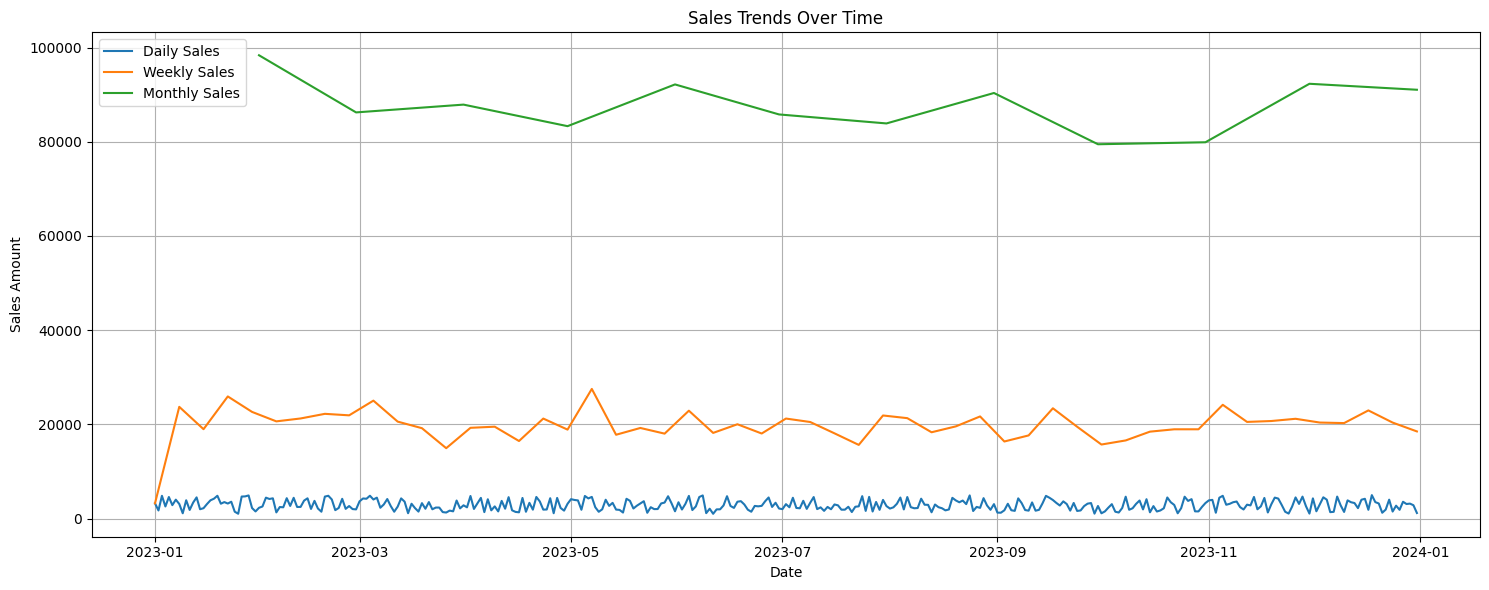

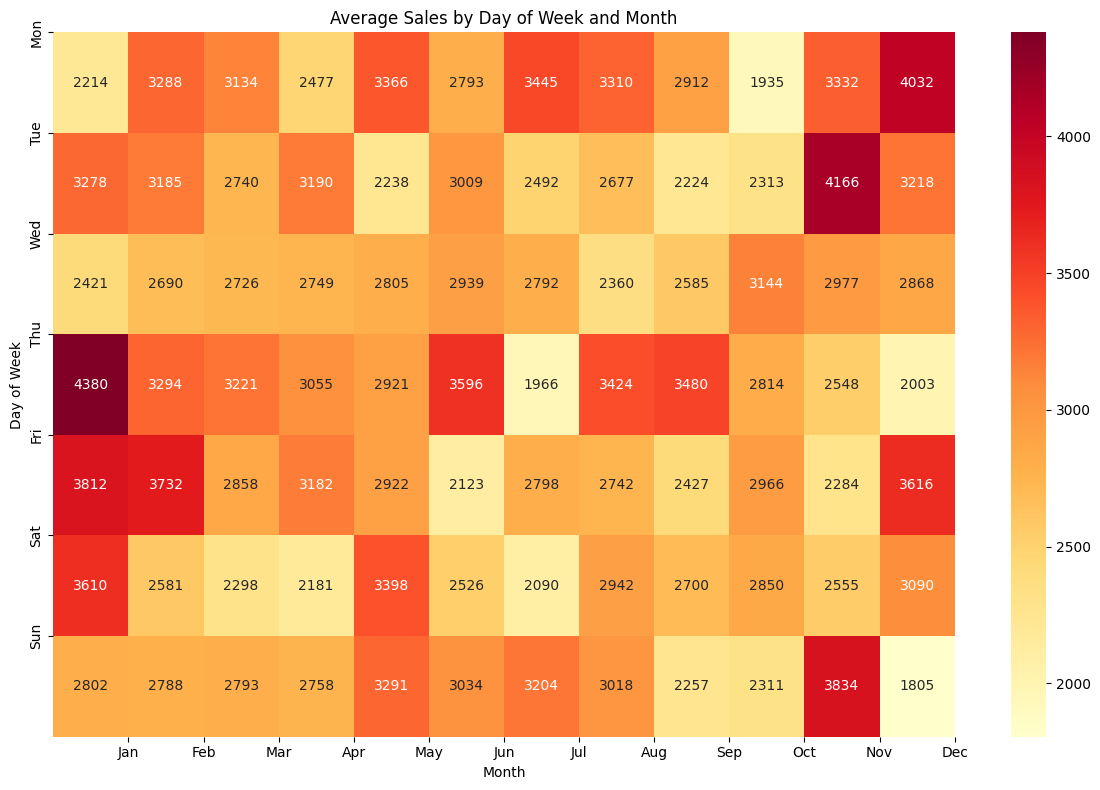

Total Sales: 1050704
Average Daily Sales: 2878.641095890411
Highest Sales Day: 2023-12-18 00:00:00 Amount: 4986
Lowest Sales Day: 2023-06-11 00:00:00 Amount: 1023


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data in a DataFrame called 'df'
# If not, you can create a sample DataFrame like this:
# df = pd.read_csv('your_data.csv')

# Sample data creation (remove this in your actual code)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
df = pd.DataFrame({
    'Date': dates,
    'Sales': np.random.randint(1000, 5000, size=len(dates))
})

# Convert 'Date' to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# 1. Line chart: Sales amount over time (daily/weekly/monthly)
plt.figure(figsize=(15, 6))

# Daily sales
plt.plot(df.index, df['Sales'], label='Daily Sales')

# Weekly sales
weekly_sales = df['Sales'].resample('W').sum()
plt.plot(weekly_sales.index, weekly_sales, label='Weekly Sales')

# Monthly sales
monthly_sales = df['Sales'].resample('M').sum()
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales')

plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Heatmap: Sales by day of week and month
# Create columns for day of week and month
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month

# Create a pivot table
pivot_table = df.pivot_table(
    values='Sales',
    index='DayOfWeek',
    columns='Month',
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Sales by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.yticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Print some summary statistics
print("Total Sales:", df['Sales'].sum())
print("Average Daily Sales:", df['Sales'].mean())
print("Highest Sales Day:", df['Sales'].idxmax(), "Amount:", df['Sales'].max())
print("Lowest Sales Day:", df['Sales'].idxmin(), "Amount:", df['Sales'].min())